#Análisis del Problema

El conjunto de datos se refiere a informes de crímenes en áreas metropolitanas importantes, como Londres. Los datos incluyen información sobre el número de informes criminales registrados mensualmente en diferentes distritos (LSOA borough) y categorías tanto principales como secundarias, abarcando el período desde enero de 2008 hasta diciembre de 2016.

## Descarga de los archivos de datos:




### Autores
* Andrey Marín Chacón
* David González Agüero

#Entendimiento de los datos

El presente conjunto de datos contiene las siguientes características:

* **lsoa_code**: Código que representa un área geográfica específica en Londres.
* **borough**: Nombre del distrito donde se reportaron los crímenes
* **mayor_category**: La categoría principal de los crímenes, como "Burglary" (Robo), "Violence Against the Person" (Violencia contra la persona), etc.
* **minor_category**: La categoría secundaria o subcategoría de los crímenes, como "Burglary in Other Buildings" (Robo en otros edificios), "Other violence" (Otra violencia), etc.
* **value**: El número de informes de crímenes en esa categoría y área geográfica en un mes específico.
* **year**: El año en el que se reportaron los crímenes.
* **month**: El mes en el que se reportaron los crímenes.

#Exploración de los datos

## Imports

In [ ]:
import pandas as pd
import numpy as np
import joblib

%matplotlib inline
import matplotlib.pyplot as plt

from sklearn.preprocessing import LabelEncoder
#from sklearn.preprocessing import RobustScaler
from pandas.plotting import scatter_matrix
from sklearn.model_selection import train_test_split
#from sklearn.impute import SimpleImputer
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

##1. Lectura del conjunto de datos

In [ ]:
#df = pd.read_csv("sample_data/london_crime_by_lsoa.csv")
df = pd.read_csv("datasets/london_crime_by_lsoa.csv")

##2. Visualización preliminar de la información

In [ ]:
df.head(10)

,lsoa_code,borough,major_category,minor_category,value,year,month
0,E01001116,Croydon,Burglary,Burglary in Other Buildings,0,2016,11
1,E01001646,Greenwich,Violence Against the Person,Other violence,0,2016,11
2,E01000677,Bromley,Violence Against the Person,Other violence,0,2015,5
3,E01003774,Redbridge,Burglary,Burglary in Other Buildings,0,2016,3
4,E01004563,Wandsworth,Robbery,Personal Property,0,2008,6
5,E01001320,Ealing,Theft and Handling,Other Theft,0,2012,5
6,E01001342,Ealing,Violence Against the Person,Offensive Weapon,0,2010,7
7,E01002633,Hounslow,Robbery,Personal Property,0,2013,4
8,E01003496,Newham,Criminal Damage,Criminal Damage To Other Building,0,2013,9
9,E01004177,Sutton,Theft and Handling,Theft/Taking of Pedal Cycle,1,2016,8


In [ ]:
df.describe()

,value,year,month
count,1.349060e+07,1.349060e+07,1.349060e+07
mean,4.779444e-01,2.012000e+03,6.500000e+00
std,1.771513e+00,2.581989e+00,3.452053e+00
min,0.000000e+00,2.008000e+03,1.000000e+00
25%,0.000000e+00,2.010000e+03,3.750000e+00
50%,0.000000e+00,2.012000e+03,6.500000e+00
75%,1.000000e+00,2.014000e+03,9.250000e+00
max,3.090000e+02,2.016000e+03,1.200000e+01


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13490604 entries, 0 to 13490603
Data columns (total 7 columns):
 #   Column          Dtype 
---  ------          ----- 
 0   lsoa_code       object
 1   borough         object
 2   major_category  object
 3   minor_category  object
 4   value           int64 
 5   year            int64 
 6   month           int64 
dtypes: int64(3), object(4)
memory usage: 720.5+ MB


Ejecutando el siguiente comando para corroborar si existen o no valores nulos, nos muestra en el resultado una lista vacia, lo que significa que en este dataset no existen nulos.

In [ ]:
# Comprobación de si existen valores nulos
is_null = df.isna().any()
is_null[is_null]

Series([], dtype: bool)

Tampoco existen valores infinitos. Ya que de manera similar al caso anterior con los nulos, nos retorna una lista vacía.

In [ ]:
# Comprobación de la existencia de valores infinitos
is_inf = df.isin([np.inf, -np.inf]).any()
is_inf[is_inf]

Series([], dtype: bool)

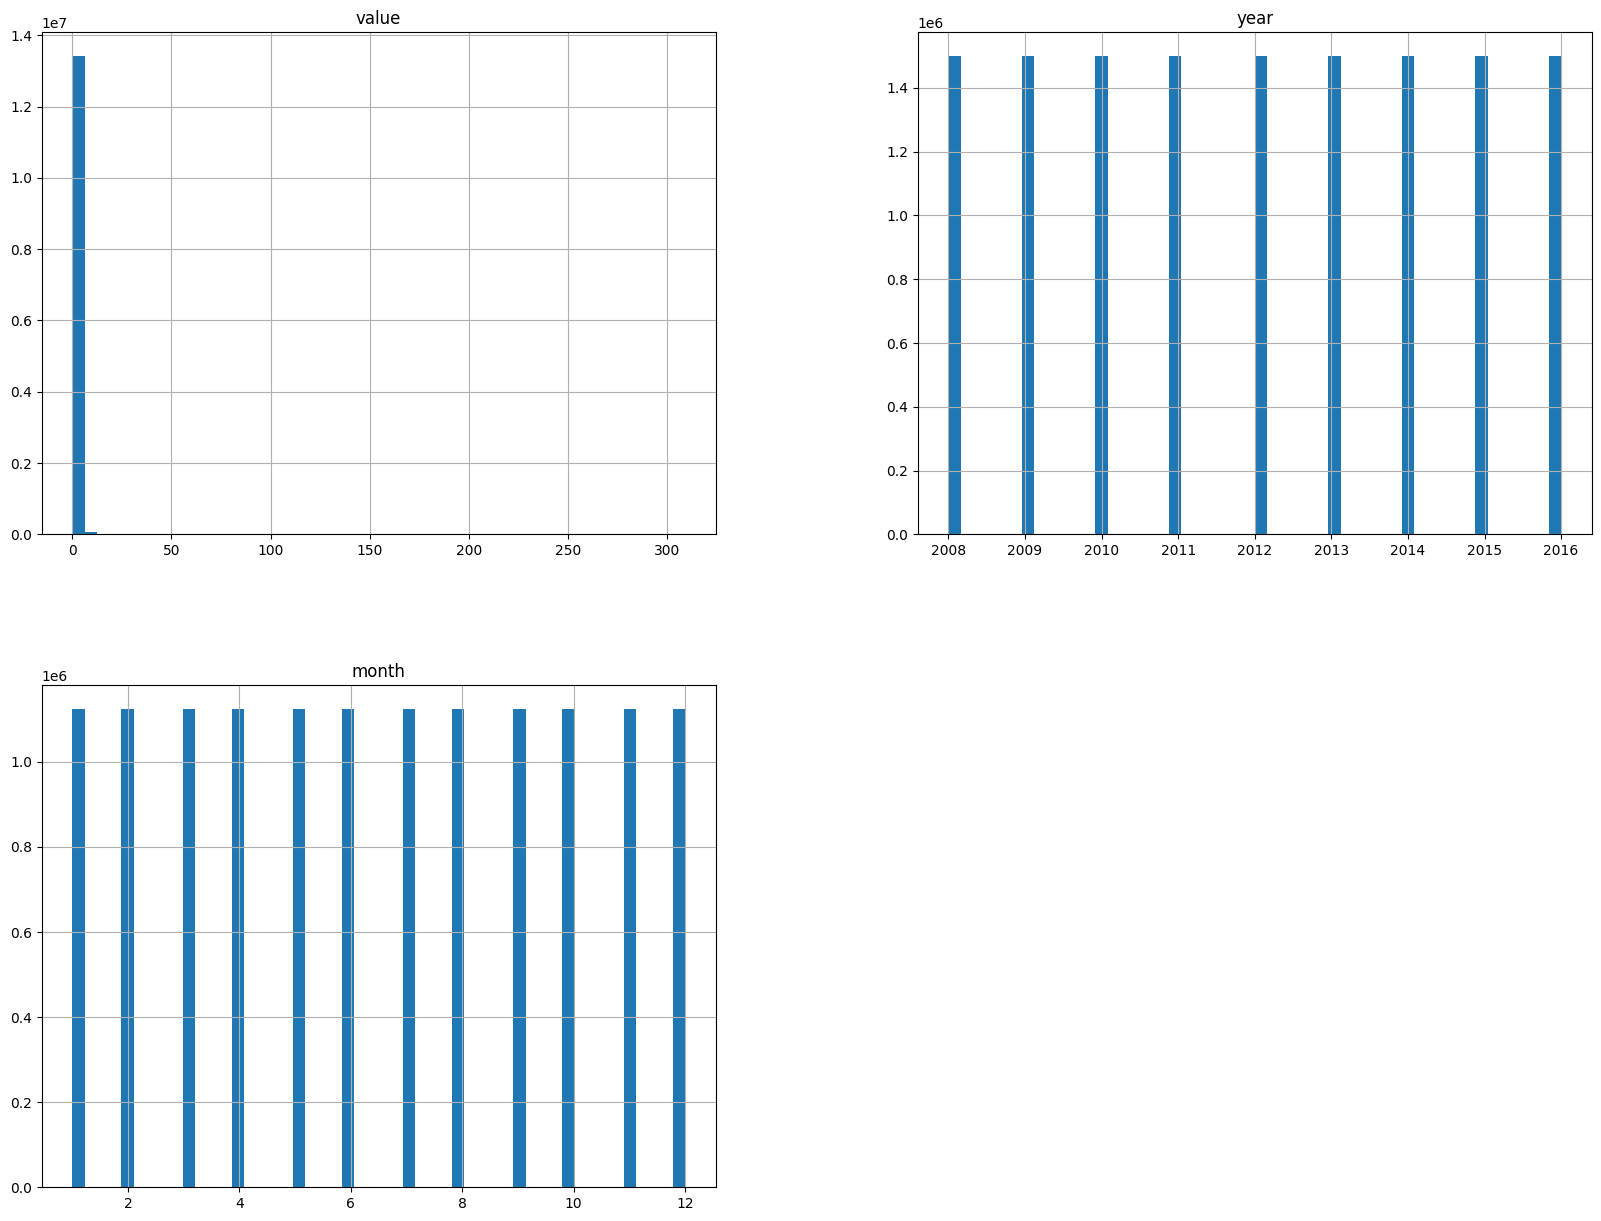

In [ ]:
# Representamos gráficamente la distribución de los atributos
df.hist(bins=50, figsize=(20,15))
plt.show()

In [ ]:
# Transformamos los valores del atributo lsoa_code de categoricos a numericos
labelencoder = LabelEncoder()
df["lsoa_code"] = labelencoder.fit_transform(df["lsoa_code"])
df

# Transformamos los valores del atributo borough de categoricos a numericos
labelencoder = LabelEncoder()
df["borough"] = labelencoder.fit_transform(df["borough"])
df

# Transformamos los valores del atributo major_category de categoricos a numericos
labelencoder = LabelEncoder()
df["major_category"] = labelencoder.fit_transform(df["major_category"])
df

# Transformamos los valores del atributo minor_category de categoricos a numericos
labelencoder = LabelEncoder()
df["minor_category"] = labelencoder.fit_transform(df["minor_category"])
df

,lsoa_code,borough,major_category,minor_category,value,year,month
0,1097,7,0,1,0,2016,11
1,1613,10,8,23,0,2016,11
2,662,4,8,23,0,2015,5
3,3689,25,0,1,0,2016,3
4,4451,31,5,24,0,2008,6
...,...,...,...,...,...,...,...
13490599,496,3,1,6,0,2015,2
13490600,2451,16,5,24,1,2015,6
13490601,4066,28,0,2,0,2011,2
13490602,1115,7,5,3,0,2011,5


In [ ]:
#Mostramos correlación lineal entre todos los atributos del conjunto de datos
df.corr()

,lsoa_code,borough,major_category,minor_category,value,year,month
lsoa_code,1.000000e+00,9.444280e-01,1.153197e-03,-3.346052e-04,0.025487,-6.551051e-15,-7.793996e-17
borough,9.444280e-01,1.000000e+00,5.529708e-04,-1.055741e-03,0.027491,6.397831e-16,3.700590e-17
major_category,1.153197e-03,5.529708e-04,1.000000e+00,4.318845e-01,0.035985,1.056369e-14,-3.072851e-17
minor_category,-3.346052e-04,-1.055741e-03,4.318845e-01,1.000000e+00,0.020980,1.194156e-14,-1.862434e-18
value,2.548682e-02,2.749142e-02,3.598509e-02,2.097985e-02,1.000000,-2.198152e-03,1.821179e-03
year,-6.551051e-15,6.397831e-16,1.056369e-14,1.194156e-14,-0.002198,1.000000e+00,-1.209409e-14
month,-7.793996e-17,3.700590e-17,-3.072851e-17,-1.862434e-18,0.001821,-1.209409e-14,1.000000e+00


En la siguiente instrucción podemos ver que no tenemos ninguna correlación fuerte con la variable de salida **value**

In [ ]:
# Mostrar la correlación entre los atributos del conjunto de datos
corr_matrix = df.corr()
corr_matrix["value"].sort_values(ascending=False)

value             1.000000
major_category    0.035985
borough           0.027491
lsoa_code         0.025487
minor_category    0.020980
month             0.001821
year             -0.002198
Name: value, dtype: float64

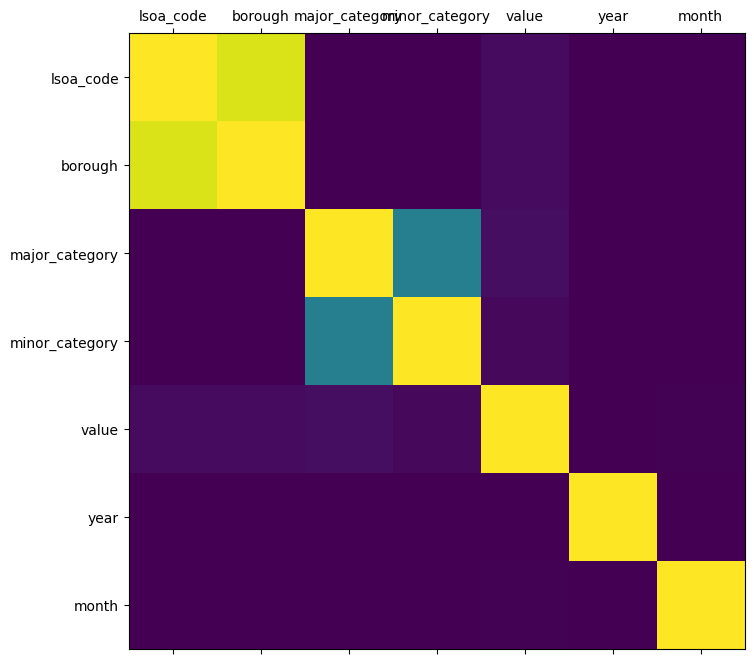

In [ ]:
# Representar gráficamente la matriz de correlación
corr = df.corr()
fig, ax = plt.subplots(figsize=(8, 8))
ax.matshow(corr)
plt.xticks(range(len(corr.columns)), corr.columns);
plt.yticks(range(len(corr.columns)), corr.columns);

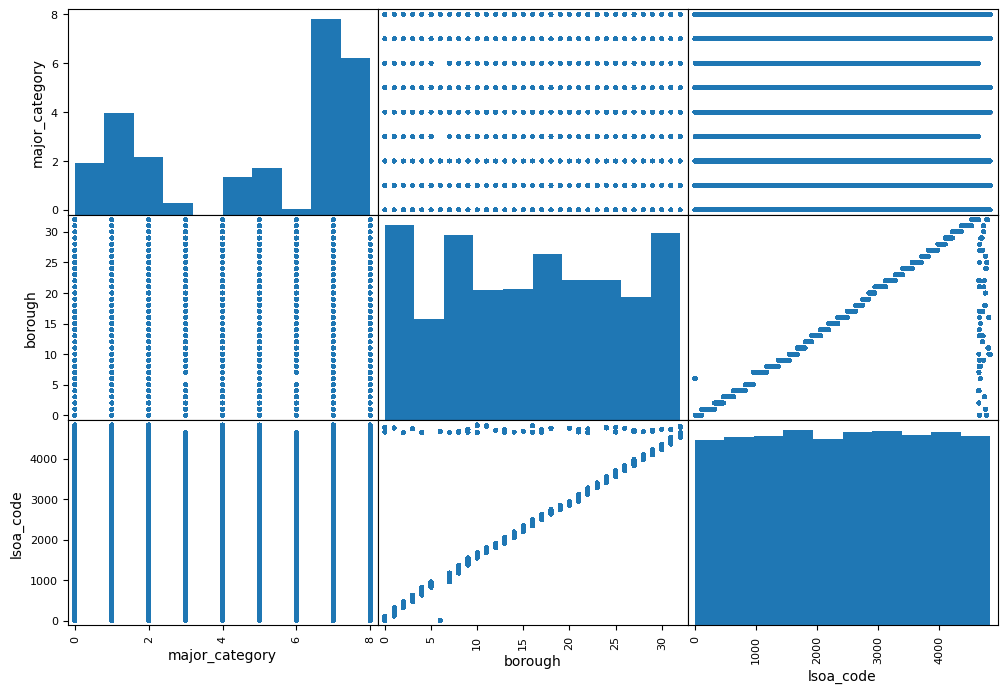

In [ ]:
# Correlaciones representadas gráficamente
atributos = ["major_category", "borough", "lsoa_code"]

scatter_matrix(df[atributos], figsize=(12, 8))
plt.show()

##3. Division del conjunto de datos

In [ ]:
# División del conjunto de datos 70/30 ya que son bastantes datos
train_set, test_set = train_test_split(df, test_size=0.3, random_state=42)

In [ ]:
train_set.info()

<class 'pandas.core.frame.DataFrame'>
Index: 9443422 entries, 8669105 to 6423388
Data columns (total 7 columns):
 #   Column          Dtype
---  ------          -----
 0   lsoa_code       int32
 1   borough         int32
 2   major_category  int32
 3   minor_category  int32
 4   value           int64
 5   year            int64
 6   month           int64
dtypes: int32(4), int64(3)
memory usage: 432.3 MB


In [ ]:
test_set.info()

<class 'pandas.core.frame.DataFrame'>
Index: 4047182 entries, 12004590 to 7750223
Data columns (total 7 columns):
 #   Column          Dtype
---  ------          -----
 0   lsoa_code       int32
 1   borough         int32
 2   major_category  int32
 3   minor_category  int32
 4   value           int64
 5   year            int64
 6   month           int64
dtypes: int32(4), int64(3)
memory usage: 185.3 MB


In [ ]:
# Separamos las características de entrada de la característica de salida
X_train = train_set.drop("value", axis=1)
y_train = train_set["value"].copy()

X_test = test_set.drop("value", axis=1)
y_test = test_set["value"].copy()

##4. Preparación del conjunto de datos

In [ ]:
X_train

,lsoa_code,borough,major_category,minor_category,year,month
8669105,172,1,7,29,2012,2
6852780,79,0,1,16,2015,7
3468317,2260,15,1,8,2015,5
3279729,1111,7,8,4,2016,2
7654653,4606,32,2,9,2012,3
...,...,...,...,...,...,...
13315092,3877,27,8,4,2013,9
4304572,2106,14,8,31,2013,9
10081351,1425,9,2,25,2010,6
6550634,1561,10,8,31,2011,1


#Modelo Regresión Lineal Simple

In [ ]:
# COnstrucción del modelo y ajuste de la función hipótesis
lin_reg = LinearRegression()
lin_reg.fit(X_train['major_category'].values.reshape(-1, 1), y_train)

LinearRegression()

In [ ]:
#Hacemos las predicciones
y_pred = lin_reg.predict(X_test['major_category'].values.reshape(-1, 1))
y_pred

array([0.39208341, 0.41384203, 0.45735928, ..., 0.4791179 , 0.39208341,
       0.39208341])

In [ ]:
print("Mean squared error: %.2f" % mean_squared_error(y_test, y_pred))

Mean squared error: 3.06


In [ ]:
# El mejor puntaje es el que esta cercano a 1
print('Variance Score: %.2f' % r2_score(y_test, y_pred))

Variance Score: 0.00


In [ ]:
lin_reg.score(X_test['major_category'].values.reshape(-1, 1), y_test)

0.0013189150779362446

#Evaluación

In [ ]:
# Parámetro theta 0
lin_reg.intercept_

0.3703247936992118

In [ ]:
# Parámetro theta 1
lin_reg.coef_

array([0.02175862])

In [ ]:
# Predicción para el valor mínimo y máximo del conjunto de datos de entrenamiento
X_min_max = np.array([[X_train["major_category"].min()], [X_train["major_category"].max()]])
y_train_pred = lin_reg.predict(X_min_max)

In [ ]:
# Representación gráfica de la función hipótesis generada
#plt.plot(X_min_max, y_train_pred, "g-")
#plt.plot(X_train['major_category'], y_train, "b.")
#plt.xlabel("value")
#plt.ylabel("major_category")
#plt.show()

#Modelo Regresión Lineal Múltiple


In [ ]:
#Escogeremos las categorias de entrada
X_train_mult = X_train[['major_category','borough', 'lsoa_code']]
X_test_mult = X_test[['major_category','borough', 'lsoa_code']]

# las transformamos en arreglo de 2 dimensiones
X_train_mult2D = X_train_mult.values
X_test_mult2D = X_test_mult.values

In [ ]:
# COnstrucción del modelo y ajuste de la función hipótesis
lin_regMult = LinearRegression()
lin_regMult.fit(X_train_mult2D, y_train)

LinearRegression()

In [ ]:
#Hacemos las predicciones
y_pred = lin_regMult.predict(X_test_mult2D)
y_pred

array([0.31741118, 0.45563502, 0.37850459, ..., 0.43568063, 0.40302065,
       0.31277863])

In [ ]:
lin_regMult.score(X_test_mult2D, y_test)

0.002079217169317027

In [ ]:
# Salvar el modelo en archivo .pkl
joblib.dump(lin_regMult, "03CantidadCrimenesL.pkl")

['03CantidadCrimenesL.pkl']

In [ ]:
# Cargar modelo
regLinealCargado = joblib.load("03CantidadCrimenesL.pkl")

#Conclusión
Como podemos observar el modelo predice bastante mal, esto debido a que la variable a predecir llamada value, no tiene una fuerte correlación con ninguna de las características. Prácticamente la mayor o mejor correlación es major_category con 0.035985.